# Lab 2: Google Colab

In this lab, we will take our first steps toward running our code in the cloud. One of the simplest way to accomplish this is through Google's free (although, there is a paid Pro version) service, **Colab**.

This lab has 5 main parts:

- **Part 1**: Get set up with Google Colab
- **Part 2**: Get the neural network you created in **Lab 1: Exercise 7** running without error in Google Colab
- **Part 3**: Preprocess images for use in **Part 4**
- **Part 4**: Modify the network of **Part 2** so that it can work with the data from **Part 3**
- **Part 5**: Modify the network of **Part 4** to improve the accuracy

## Grading

Please read all instructions carefully, including the following notes:
- include only FINAL code unless directed otherwise
- all code should be in Keras/Python
- all code should run error free in Google Colab
- marks will be deducted for formatting that makes the lab difficult to understand
- marks will be deducted for unnecessary code, that is, code that is not needed to accomplish the required task

## What to submit

- a copy of this completed .ipynb file (can be accomplished in Colab using `file/download/Download .ipynb`)
- a link to this completed notebook on Google Colab (can be accomplished by clicking on **Share** and then selecting *Anyone with this link can edit*)

## Part 1 (0 marks)

To use **Colab**, you need to have a Google account. To get a free Google account, go the the [sign up](https://accounts.google.com/) and fill in the necessary information. If you already have a Google account, you can skip this step. (If you have a gmail address, then you already have a Google Account.)

<img src="google_signup.png" width=600 align="center">

Once you have an account, you will need to sign in. To do this, go to [google.com](https://google.com):

<img src="google_signin.png" width=600 align="center">

After you are signed in, navigate to [Google Colab](https://colab.research.google.com). 

<img src="colab_intro.png" width=600 align="center">

From here, click on **New Notebook**, give the notebook a name and then **save** it. Now you should verify the folder structure in **Google Drive**. To do this, you should navigate back to [google.com](https://google.com), and select **Drive** from the menu at the top right:

<img src="drive.png" width=600 align="center">

Once you are in your Google Drive, you should have a folder structure identical to the following (the name you gave your notebook can be different):
<img src="colab_notebook_save.png" width=600 align="center">

**If you don't have this exact folder structure, your lab will not get graded!**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Part 2 (10 marks)

Following the procedure outlined in Lab 1, reproduce the code created in Exercise 7 in Google Colab. Verify that you get similar results using the same MNIST data that you used for Lab 1.

To upload the Lab 1 file (or any other file) to your Google Drive, simply click on the **New** button in the top left, and then selct **File upload**: 

<img src="lab_upload.png" width=600 align="center">


In [7]:
from tensorflow.keras.datasets import mnist
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

from tensorflow.keras.utils import to_categorical






In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype('float32') / 255
train_images = train_images.reshape((60000, 28 * 28))

test_images = test_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


In [9]:

network_1 = Sequential()
network_1.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network_1.add(Dense(200, activation='relu'))
network_1.add(Dropout(0.5))
network_1.add(Dense(130, activation='relu'))
network_1.add(Dense(10, activation='softmax'))

network_1.summary()
optimizer = tf.keras.optimizers.Adam(lr = 0.002)
network_1.compile(optimizer= optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network_1.fit(train_images, train_labels, epochs=17, batch_size=350, verbose=1)

test_loss, test_acc = network_1.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 200)               102600    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_16 (Dense)            (None, 130)               26130     
                                                                 
 dense_17 (Dense)            (None, 10)                1310      
                                                                 
Total params: 531,960
Trainable params: 531,960
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/17
172/172 [==============================] - 11s 56ms/step - loss: 0.3311 - accuracy: 0.8996
Epoch 2/17
172/172 [==============================] - 10s 59ms/step - loss: 0.1224 - accuracy: 0.9640
Epoch 3/17
172/172 [==============================] - 8s 47ms/step - loss: 0.0897 - accuracy: 0.9726
Epoch 4/17
172/172 [==============================] - 7s 41ms/step - loss: 0.0659 - accuracy: 0.9794
Epoch 5/17
172/172 [==============================] - 7s 39ms/step - loss: 0.0534 - accuracy: 0.9832
Epoch 6/17
172/172 [==============================] - 4s 25ms/step - loss: 0.0452 - accuracy: 0.9857
Epoch 7/17
172/172 [==============================] - 4s 25ms/step - loss: 0.0368 - accuracy: 0.9884
Epoch 8/17
172/172 [==============================] - 4s 25ms/step - loss: 0.0312 - accuracy: 0.9901
Epoch 9/17
172/172 [==============================] - 4s 25ms/step - loss: 0.0316 - accuracy: 0.9897
Epoch 10/17
172/172 [==============================] - 4s 25ms/step - loss: 0.0244 - accu

### Extra Computational Power

One reason to use Google Colab is because it offers extra computational power in the form of access to GPUs for training larger models. As this is a free service, the extra compute resources come with some limitations (see Resource Limits section in the [FAQ](https://research.google.com/colaboratory/faq.html)). To access these extra compute resources, select the **Runtime** tab: 

<img src="runtime_1.png" width=600 align="center">

Then select **Change runtime type**, choose **GPU** from the drop-down menu, and click **Save**:

<img src="runtime_2.png" width=600 align="center">

Now, when you run code in that notebook, it can run on GPUs instead of CPUs.

## Part 3 (25 marks)

The first step here is to upload the **Lego_small** data ([source](https://www.kaggle.com/joosthazelzet/lego-brick-images) that was provided with this notebook. (**Do not use the data from the *source* link.**) To do this, just upload the entire folder to your Google Drive. When you have done that you should have a folder structure that looks something like this: 

<img src="lab_upload_lego.png" width=600 align="center">

To have access to the data in your Google Drive, you will need to run the following code to 'mount' your Drive so it is accessible to the notebook you are running on Google Colab. When you run the code, following the instructions so that your notebook can access the data. 

Now, you need to convert the images you just uploaded into a data structure similar to the MNIST data from Lab 1. The number of images and the pixel dimensions are, however, different than the MNIST data. 

**The goal here is to get the data into the correct shape so that you can use it with a fully connected neural network.**

To accomplish this task, you will need to:
 - load the images from the various folders of the *Leaves* data
 - make sure they are grayscale and not RGB
 - convert the images to NumPy arrays
 - resize any images that are not the correct size
 - store these arrays in the proper shape in an appropriate data structure
 - create a target array to keep track of the proper class of each image in your data
 - view a few images after processing to verify that everything is working as it should
 - convert image arrays to one-dimensional and scale the pixel values so they are between 0 and 1
 - verify the images and target arrays have the correct dimensions
 - convert string labels to integers
 
Aside from the packages imported below, you may find the following helpful to process the images properly:
 - [info](https://realpython.com/python-pathlib/) on `Path` so you know how to create a path to the images
 - the `.name` method that can the file or directory name from a `Path` object
 - the `.reshape()` method
 - the `.append()` method
 
**Note that not all of the tasks above have starter code below, so be sure you have completed all tasks.**

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

Fill in the missing elements of the starter code below. 

In [12]:
p = Path().cwd()
q = p/'drive'/'MyDrive'/'Colab_Notebooks'/'Lego_small' # use p to create a path to the data 

target_dict = { 'brick 1x2':0,
               'brick 2x2':1,
               'brick 2x4':2,
               'plate 1x2':3,
               'plate 2x2':4,
                'plate 2x4':5
}
images = []
labels = []

for fldr in q.iterdir(): 
    current_label = fldr.name  
    for img in fldr.iterdir():
        img =load_img(img, color_mode='grayscale') 
        img_array = img_to_array(img) 
        img_array_resized = smart_resize(img_array,[128,128])
        img_array_reshaped = img_array_resized.reshape(128,128)
        images.append(img_array_reshaped)
        labels.append(current_label)

images = np.array(images)
labels = np.array(labels)

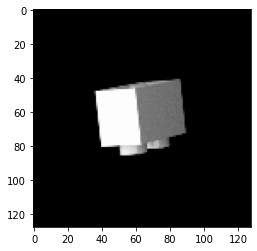

In [13]:
# use plt.imshow() to view a few of the grayscale images
plt.imshow(images[16], cmap='gray')

In [14]:
labels_int = np.array([target_dict[x] for x in labels]) # use the target_dict to convert the string labels to an array of integers

In [15]:
images.shape

(4800, 128, 128)

## Part 4 (25 marks)

The next step is to modify the network of Part 2 so that it will work with the data that was processed in Part 3. 

Here, you will need to:
 - use `sklearn` to create training, validation, and test sets in approximately the following ratio: 70%/20%/10%
 - train your network for 10 epochs while monitoring the accuracy on the validation (to do this, you will need to modify the `.fit()` method)
 - compute the overall accuracy on the test data
 - compute the confusion matrix (use `tf.math.confusion_matrix()`)
 - from the confusion matrix, compute the accuracy for each Lego block type (see image below)

<img src="cm-calculation.jpg" width=600 align="center">

In [16]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_int, test_size=0.1, random_state=1)

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.20, random_state=1)

train_images = train_images.astype('float32') / 255
train_images = train_images.reshape((3456, 128 * 128))

test_images = test_images.astype('float32') / 255
test_images = test_images.reshape((480, 128 * 128))

val_images = val_images.astype('float32') / 255
val_images = val_images.reshape((864, 128 * 128))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels=to_categorical(val_labels)


In [21]:
network_1 = Sequential()
network_1.add(Dense(512, activation='relu', input_shape=(128 * 128,)))
network_1.add(Dense(200, activation='relu'))
network_1.add(Dropout(0.5))
network_1.add(Dense(130, activation='relu'))
network_1.add(Dense(6, activation='softmax'))

In [22]:
network_1.summary()
optimizer = tf.keras.optimizers.Adam(lr=0.001)

network_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
                
network_1.fit(train_images, train_labels,validation_data=(val_images, val_labels), epochs=10, batch_size=256, verbose=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 512)               8389120   
                                                                 
 dense_27 (Dense)            (None, 200)               102600    
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_28 (Dense)            (None, 130)               26130     
                                                                 
 dense_29 (Dense)            (None, 6)                 786       
                                                                 
Total params: 8,518,636
Trainable params: 8,518,636
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
14/14 [==============================] - 8s 481ms/step - loss: 1.3375 - accuracy: 0.4641 - val_loss: 0.7450 - val_accuracy: 0.7083
Epoch 2/10
14/14 [==============================] - 4s 282ms/step - loss: 0.9007 - accuracy: 0.6458 - val_loss: 0.7377 - val_accuracy: 0.7002
Epoch 3/10
14/14 [==============================] - 3s 217ms/step - loss: 0.7823 - accuracy: 0.7072 - val_loss: 0.6583 - val_accuracy: 0.7581
Epoch 4/10
14/14 [==============================] - 4s 255ms/step - loss: 0.7266 - accuracy: 0.7245 - val_loss: 0.5712 - val_accuracy: 0.7986
Epoch 5/10
14/14 [==============================] - 5s 346ms/step - loss: 0.6527 - accuracy: 0.7648 - val_loss: 0.5936 - val_accuracy: 0.7905
Epoch 6/10
14/14 [==============================] - 5s 348ms/step - loss: 0.6358 - accuracy: 0.7772 - val_loss: 0.5448 - val_accuracy: 0.7951
Epoch 7/10
14/14 [==============================] - 6s 457ms/step - loss: 0.5775 - accuracy: 0.7969 - val_loss: 0.4919 - val_accuracy: 0.8391
Epoch 

In [23]:
test_loss, test_acc = network_1.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

15/15 [==============================] - 1s 41ms/step - loss: 0.4678 - accuracy: 0.8562
test_acc: 0.856249988079071


In [25]:
a_class=[]
for x in range(0,len(test_images)):
  a_class.append(np.argmax(test_labels[x]))

a_class=np.array(a_class)  
a_class.shape

(480,)

In [27]:
prediction=network_1.predict(test_images)
p_class=[]      
for x in range(0,len(test_images)):
  p_class.append(np.argmax(prediction[x]))

p_class=np.array(p_class)                           
p_class.shape


(480,)

In [30]:
cm = tf.math.confusion_matrix(a_class , p_class)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[70,  0,  0,  9,  4,  0],
       [ 5, 71,  0,  0,  2,  0],
       [ 0,  2, 67,  0,  0, 19],
       [ 0,  0,  0, 73,  0,  0],
       [10,  3,  0,  2, 66,  0],
       [ 3,  2,  4,  0,  4, 64]], dtype=int32)>

In [31]:
print('Accuracy for Lego block type brick 1x2')
print(cm[0,0]/sum(cm[:,0]))
print('Accuracy for Lego block type brick 2x2')
print(cm[1,1]/sum(cm[:,1]))
print('Accuracy for Lego block type brick 2x4')
print(cm[2,2]/sum(cm[:,2]))
print('Accuracy for Lego block type plate 1x2')
print(cm[3,3]/sum(cm[:,3]))
print('Accuracy for Lego block type plate 2x2')
print(cm[4,4]/sum(cm[:,4]))
print('Accuracy for Lego block type plate 2x4')
print(cm[5,5]/sum(cm[:,5]))

Accuracy for Lego block type brick 1x2
tf.Tensor(0.7954545454545454, shape=(), dtype=float64)
Accuracy for Lego block type brick 2x2
tf.Tensor(0.9102564102564102, shape=(), dtype=float64)
Accuracy for Lego block type brick 2x4
tf.Tensor(0.9436619718309859, shape=(), dtype=float64)
Accuracy for Lego block type plate 1x2
tf.Tensor(0.8690476190476191, shape=(), dtype=float64)
Accuracy for Lego block type plate 2x2
tf.Tensor(0.868421052631579, shape=(), dtype=float64)
Accuracy for Lego block type plate 2x4
tf.Tensor(0.7710843373493976, shape=(), dtype=float64)


## Part 5 (25 marks)

The final step is to modify the network of **Part 4** to improve the accuracy as much as possible. When finished:
 - train your network for as many epochs as necessary for the accuracy to stop improving
 - compute the new overall accuracy on the test data and compare with that of **Part 4**
 - compute the new confusion matrix (use `tf.math.confusion_matrix()`) and compare with that of **Part 4**
 - from the confusion matrix, compute the new accuracy for each Lego block type and compare with that of **Part 4**


In [35]:
network_1.fit(train_images, train_labels, epochs=500, batch_size=128, validation_data=(val_images, val_labels), verbose=1)

test_loss, test_acc = network_1.evaluate(test_images, test_labels)

Epoch 1/500
27/27 [==============================] - 5s 203ms/step - loss: 0.3164 - accuracy: 0.8970 - val_loss: 0.4199 - val_accuracy: 0.8646
Epoch 2/500
27/27 [==============================] - 5s 196ms/step - loss: 0.2902 - accuracy: 0.9077 - val_loss: 0.4916 - val_accuracy: 0.8553
Epoch 3/500
27/27 [==============================] - 6s 222ms/step - loss: 0.2745 - accuracy: 0.9071 - val_loss: 0.4090 - val_accuracy: 0.8715
Epoch 4/500
27/27 [==============================] - 6s 232ms/step - loss: 0.2484 - accuracy: 0.9146 - val_loss: 0.4205 - val_accuracy: 0.8738
Epoch 5/500
27/27 [==============================] - 5s 200ms/step - loss: 0.2222 - accuracy: 0.9265 - val_loss: 0.4464 - val_accuracy: 0.8738
Epoch 6/500
27/27 [==============================] - 5s 204ms/step - loss: 0.2017 - accuracy: 0.9306 - val_loss: 0.3938 - val_accuracy: 0.8877
Epoch 7/500
27/27 [==============================] - 5s 202ms/step - loss: 0.1646 - accuracy: 0.9433 - val_loss: 0.4311 - val_accuracy: 0.8762

In [37]:
test_loss8, test_acc8 = network_1.evaluate(test_images, test_labels)
print('test_acc:', test_acc8)

15/15 [==============================] - 0s 23ms/step - loss: 1.1615 - accuracy: 0.8917
test_acc: 0.8916666507720947


In [38]:
t_class=[]
for x in range(0,len(test_images)):
  t_class.append(np.argmax(test_labels[x]))

t_class=np.array(t_class)  
t_class.shape

(480,)

In [40]:
prediction=network_1.predict(test_images)
p_class=[]      
for x in range(0,len(test_images)):
  p_class.append(np.argmax(prediction[x]))

p_class=np.array(p_class)                           
p_class.shape

(480,)

In [41]:
cm2=tf.math.confusion_matrix(a_class , p_class)
cm2

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[69,  1,  0,  9,  4,  0],
       [ 3, 73,  0,  0,  2,  0],
       [ 0,  2, 77,  0,  0,  9],
       [ 1,  0,  0, 69,  3,  0],
       [ 7,  0,  0,  1, 73,  0],
       [ 1,  1,  3,  0,  5, 67]], dtype=int32)>

In [42]:
print('Accuracy for Lego block type brick 1x2')
print(cm2[0,0]/sum(cm2[:,0]))
print('Accuracy for Lego block type brick 2x2')
print(cm2[1,1]/sum(cm2[:,1]))
print('Accuracy for Lego block type brick 2x4')
print(cm2[2,2]/sum(cm2[:,2]))
print('Accuracy for Lego block type plate 1x2')
print(cm2[3,3]/sum(cm2[:,3]))
print('Accuracy for Lego block type plate 2x2')
print(cm2[4,4]/sum(cm2[:,4]))
print('Accuracy for Lego block type plate 2x4')
print(cm2[5,5]/sum(cm2[:,5]))

Accuracy for Lego block type brick 1x2
tf.Tensor(0.8518518518518519, shape=(), dtype=float64)
Accuracy for Lego block type brick 2x2
tf.Tensor(0.948051948051948, shape=(), dtype=float64)
Accuracy for Lego block type brick 2x4
tf.Tensor(0.9625, shape=(), dtype=float64)
Accuracy for Lego block type plate 1x2
tf.Tensor(0.8734177215189873, shape=(), dtype=float64)
Accuracy for Lego block type plate 2x2
tf.Tensor(0.8390804597701149, shape=(), dtype=float64)
Accuracy for Lego block type plate 2x4
tf.Tensor(0.881578947368421, shape=(), dtype=float64)
